## Question of Interest: What traits are most common in lottery winners

### IMPORTING DATA



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importing dataset
data_raw = pd.read_csv('../data/raw/Winners_List_of_Texas_Lottery__Prizes_20250418.csv')

C:\Users\fukud\AppData\Local\Temp\ipykernel_27136\943585097.py:1: DtypeWarning: Columns (19,20,21,22,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv('../data/raw/Winners_List_of_Texas_Lottery__Prizes_20250418.csv')


In [3]:
data_raw.head()

,Row ID,Claim Number,Amount Won,Date Claim Paid,Player ID,Annuity Indicator,Anonymous Indicator,Claim Center Location,Claim Type,US Citizen Flag,...,Retailer Number,Retailer Name,Retailer Number and Name,Retailer Address 1,Retailer Address 2,Retailer City,Retailer State,Retailer Zip Code,Retailer Zip Code +4,Retailer County
0,I-22040583050-163900270,22040583050,30.0,06/06/2022,102314082.0,No,No,Austin Super User,Individual,Yes,...,188732.0,TRISTAR #10,188732 - TRISTAR #10,2041 S INTERSTATE 35,STE 104,San Marcos,TX,78666.0,NaN,Hays
1,I-22052612091-164618770,22052612091,20.0,06/06/2022,102314068.0,No,No,Austin Super User,Individual,Not Provided,...,190174.0,7 DAY CORNER STORE,190174 - 7 DAY CORNER STORE,3103 W MARTIN,NaN,San Antonio,TX,78207.0,NaN,Bexar
2,I-22052612091-164618772,22052612091,20.0,06/06/2022,102314068.0,No,No,Austin Super User,Individual,Not Provided,...,151047.0,FUEL STATION 4,151047 - FUEL STATION 4,2100 NW MILITARY HWY,NaN,Castle Hills,TX,78213.0,NaN,Bexar
3,I-22052612094-164618798,22052612094,5.0,06/06/2022,100896850.0,No,No,Austin Super User,Individual,Yes,...,151846.0,PETRO STOPPING CENTERS #302,151846 - PETRO STOPPING CENTERS #302,2001 SANTA FE DR,NaN,Weatherford,TX,76086.0,NaN,Parker
4,I-22052612096-164619885,22052612096,2.0,06/06/2022,102314119.0,No,No,Austin Super User,Individual,Not Provided,...,187914.0,24 EXPRESS,187914 - 24 EXPRESS,7241 MONROE RD STE A,NaN,Houston,TX,77061.0,NaN,Harris


In [4]:
data_raw.shape

(2856283, 35)

The data has a lot of irrelevant columns (for our purposes) such as  IDs and also columns that have to do with anything claiming related like claim date and annuity.

Removing these will make the data more streamlined and compile faster.


In [5]:
# removing unneeded columns
data = data_raw.drop(columns=["Row ID", "Claim Number", "Date Claim Paid", "Player ID", "Annuity Indicator", "Anonymous Indicator", "Claim Center Location", "Claim Type", "Last Name", 
"First Name", "Claimant Name and Player ID", "Claimant Country", "Prize or Merchandise Indicator", "Date of Draw", "Draw Time of Day", "Prize Level", "Scratch Ticket Game Number", 
"Retailer Number", "Retailer Number and Name", "Retailer Address 1", "Retailer Address 2", "Retailer State", "Retailer Zip Code", "Retailer Zip Code +4"])

In [6]:
data.head()

,Amount Won,US Citizen Flag,Claimant City,Claimant State,Claimant County,Scratch Ticket or Draw Game,Date Ticket Sold,Scratch Ticket Cost,Retailer Name,Retailer City,Retailer County
0,30.0,Yes,Grand Rapids,MI,Kent,Scratch Tickets,NaN,10.0,TRISTAR #10,San Marcos,Hays
1,20.0,Not Provided,San Antonio,TX,Bexar,Scratch Tickets,NaN,20.0,7 DAY CORNER STORE,San Antonio,Bexar
2,20.0,Not Provided,San Antonio,TX,Bexar,Scratch Tickets,NaN,20.0,FUEL STATION 4,Castle Hills,Bexar
3,5.0,Yes,Los Angeles,CA,Los Angeles,Scratch Tickets,NaN,3.0,PETRO STOPPING CENTERS #302,Weatherford,Parker
4,2.0,Not Provided,Fort Deposit,AL,Lowndes,Scratch Tickets,NaN,1.0,24 EXPRESS,Houston,Harris


In [7]:
data.shape

(2856283, 11)

### DATA CLEANING

#### Splitting the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856283 entries, 0 to 2856282
Data columns (total 11 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Amount Won                   float64
 1   US Citizen Flag              object 
 2   Claimant City                object 
 3   Claimant State               object 
 4   Claimant County              object 
 5   Scratch Ticket or Draw Game  object 
 6   Date Ticket Sold             object 
 7   Scratch Ticket Cost          float64
 8   Retailer Name                object 
 9   Retailer City                object 
 10  Retailer County              object 
dtypes: float64(2), object(9)
memory usage: 239.7+ MB


In [ ]:
# Checking for missing values
data.isna().sum()

Amount Won                           0
US Citizen Flag                      0
Claimant City                       78
Claimant State                    2013
Claimant County                1019568
Scratch Ticket or Draw Game          0
Date Ticket Sold               2214575
Scratch Ticket Cost            1187860
Retailer Name                        0
Retailer City                  1028392
Retailer County                1028392
dtype: int64

Missing values in "date ticket sold" and "scratch ticket cost" result from scratch tickets not having a date recorded and drawing tickets not being scratch tickets thus not having a listed price

Separating the data into scratch and drawing will reduce the missing values

In [10]:
# Divide data into two based on if its a scratch ticket or draw ticket
data_scratch = data[data["Scratch Ticket or Draw Game"] == "Scratch Tickets"]
data_draw = data[data["Scratch Ticket or Draw Game"] != "Scratch Tickets"]

In [11]:
# Confirming split
data_scratch.sample(10)

,Amount Won,US Citizen Flag,Claimant City,Claimant State,Claimant County,Scratch Ticket or Draw Game,Date Ticket Sold,Scratch Ticket Cost,Retailer Name,Retailer City,Retailer County
1305193,10.0,Not Provided,Norwalk,CA,Los Angeles,Scratch Tickets,NaN,5.0,GATEWAY NEWSTAND,Dallas,Dallas
1716173,1000.0,Yes,Minden,LA,Webster,Scratch Tickets,NaN,50.0,GATEWAY OF NACOGDOCHES,Nacogdoches,Nacogdoches
19651,1000.0,Yes,Mt Pleasant,TX,Titus,Scratch Tickets,NaN,20.0,EXPRESS FOOD MART #2,Mount Pleasant,Titus
1907765,1.0,Yes,San Antonio,TX,NaN,Scratch Tickets,NaN,1.0,Unknown,NaN,NaN
2825329,1000.0,Yes,Fort Worth,TX,Tarrant,Scratch Tickets,NaN,5.0,7-ELEVEN CONVENIENCE STORE #36095K,Fort Worth,Tarrant
2710649,1000.0,Yes,Santa Fe,TX,Galveston,Scratch Tickets,NaN,100.0,ON THE WAY FOOD MART,Santa Fe,Galveston
12101,2.0,Yes,Canyon,TX,Randall,Scratch Tickets,NaN,2.0,MURPHY USA 7188,Canyon,Randall
2421921,3.0,Yes,Dallas,TX,Dallas,Scratch Tickets,NaN,3.0,Unknown,NaN,NaN
2098008,1000.0,Yes,Snyder,TX,Scurry,Scratch Tickets,NaN,10.0,Unknown,NaN,NaN
1298041,4.0,Not Provided,Mcallen,TX,Hidalgo,Scratch Tickets,NaN,3.0,7-ELEVEN #36587,Austin,Travis


In [12]:
data_draw.sample(10)

,Amount Won,US Citizen Flag,Claimant City,Claimant State,Claimant County,Scratch Ticket or Draw Game,Date Ticket Sold,Scratch Ticket Cost,Retailer Name,Retailer City,Retailer County
350751,660.0,No,Nuevo Laredo,OA,NaN,Pick 3™,NaN,NaN,Unknown,NaN,NaN
1089720,550.0,Yes,Amarillo,TX,NaN,Cash Five®,NaN,NaN,TOOT'N TOTUM #29,Amarillo,Potter
488871,1640.0,Yes,Helotes,TX,Bexar,Lotto Texas®,09/12/2011,NaN,CIRCLE K #2741056,San Antonio,Bexar
2571088,200.0,Yes,Morgan City,LA,Saint Mary,Mega Millions®,04/23/2024,NaN,WEATHERFORD MOBIL,Weatherford,Parker
719884,4.0,Yes,Venice,CA,Los Angeles,Mega Millions®,10/19/2018,NaN,AUSTIN SHELL,Austin,Travis
815274,200.0,Yes,Channelview,TX,Harris,Mega Millions®,11/22/2022,NaN,PICK N PAY,Houston,Harris
1154228,828.0,Yes,Tomball,TX,NaN,Cash Five®,NaN,NaN,Unknown,NaN,NaN
620862,500.0,Yes,Arlington,TX,Tarrant,Mega Millions®,04/25/2016,NaN,QUIKTRIP 856,Arlington,Tarrant
731395,1365.0,Yes,San Antonio,TX,NaN,Lotto Texas®,NaN,NaN,Unknown,NaN,NaN
162079,660.0,Yes,Houston,TX,Harris,Pick 3™,08/14/2015,NaN,T MART,Pasadena,Harris


#### Cutting down data in each split

Now that the data is split, we can get rid of unneeded columns "Date ticket sold" and "Scratch ticket cost" respectively

In [13]:
data_scratch.shape

(1668425, 11)

In [14]:
data_draw.shape


(1187858, 11)

In [15]:
data.shape

(2856283, 11)

In [16]:
# Confirming no data was lost
1668425 + 1187858

2856283

In [17]:
data_scratch.isna().sum()

Amount Won                           0
US Citizen Flag                      0
Claimant City                       51
Claimant State                     466
Claimant County                 572258
Scratch Ticket or Draw Game          0
Date Ticket Sold               1668425
Scratch Ticket Cost                  2
Retailer Name                        0
Retailer City                   786029
Retailer County                 786029
dtype: int64

In [18]:
data_draw.isna().sum()

Amount Won                           0
US Citizen Flag                      0
Claimant City                       27
Claimant State                    1547
Claimant County                 447310
Scratch Ticket or Draw Game          0
Date Ticket Sold                546150
Scratch Ticket Cost            1187858
Retailer Name                        0
Retailer City                   242363
Retailer County                 242363
dtype: int64

In [19]:
# Remove scratch ticket or draw game since all data is scratch ticket
data_scratch = data_scratch.drop(columns=["Scratch Ticket or Draw Game", "Date Ticket Sold"]) 

# Don't remove scratch ticket or draw game since data shows draw game type
data_draw = data_draw.drop(columns=["Scratch Ticket Cost"])


#### Graphing the numerics

Amount of scratch ticket costs not listed is 2, insignificant to the total amount of 1.6 million so we can remove

In [20]:
# Remove missing value of scratch ticket cost from scratch_numerics
data_scratch = data_scratch.dropna(subset=["Scratch Ticket Cost"])

In [21]:
data_scratch.isna().sum()

Amount Won                  0
US Citizen Flag             0
Claimant City              51
Claimant State            466
Claimant County        572256
Scratch Ticket Cost         0
Retailer Name               0
Retailer City          786027
Retailer County        786027
dtype: int64

In [22]:
scratch_numerics = data_scratch.select_dtypes("number")
draw_numerics = data_draw.select_dtypes("number")
scratch_numerics

,Amount Won,Scratch Ticket Cost
0,30.0,10.0
1,20.0,20.0
2,20.0,20.0
3,5.0,3.0
4,2.0,1.0
...,...,...
2855133,1000.0,100.0
2855134,1000.0,20.0
2855135,1000.0,100.0
2855136,1000.0,100.0


In [23]:
draw_numerics

,Amount Won
190,2500.0
233,2500.0
359,800.0
421,2500.0
444,500.0
...,...
2856278,675.0
2856279,5000.0
2856280,731.0
2856281,22.0


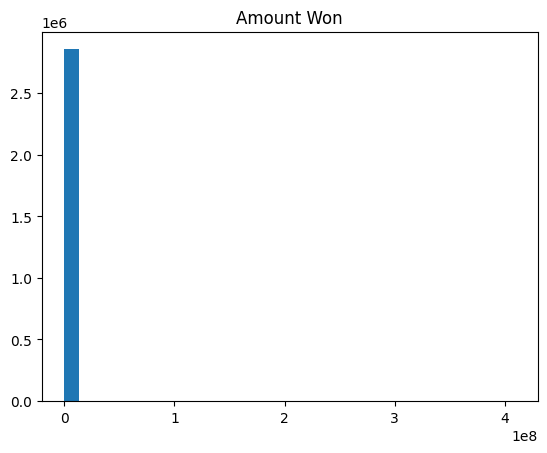

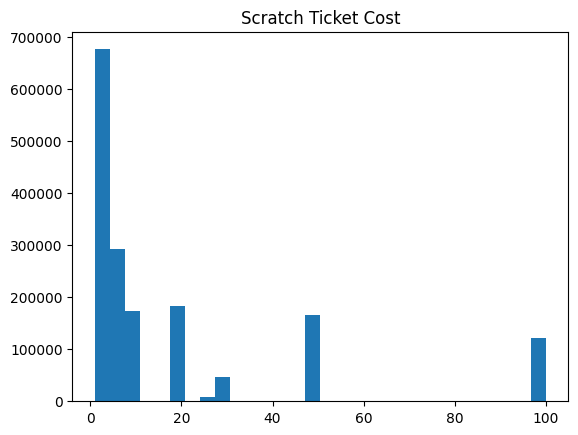

In [24]:
for column in scratch_numerics.columns:
    plt.figure()
    plt.hist(data[column],bins=30)
    plt.title(column)
    plt.show()

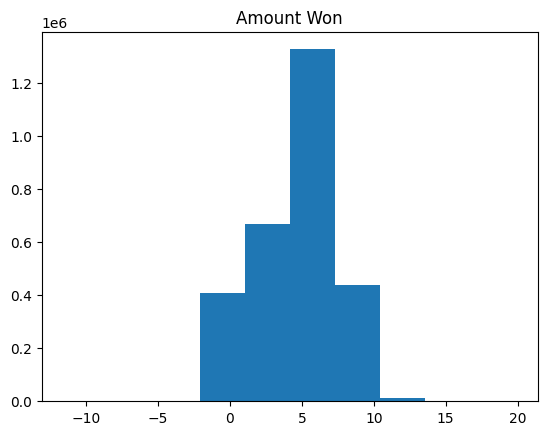

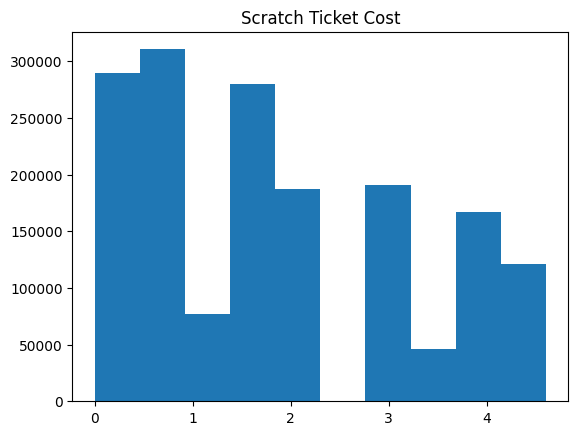

In [25]:
# Adding very small value to avoid log(0), small bin size since ticket cost was staggered

for column in scratch_numerics.columns:
    plt.figure()
    plt.hist(np.log(data[column] + 1e-5),bins=10)
    plt.title(column)
    plt.show()

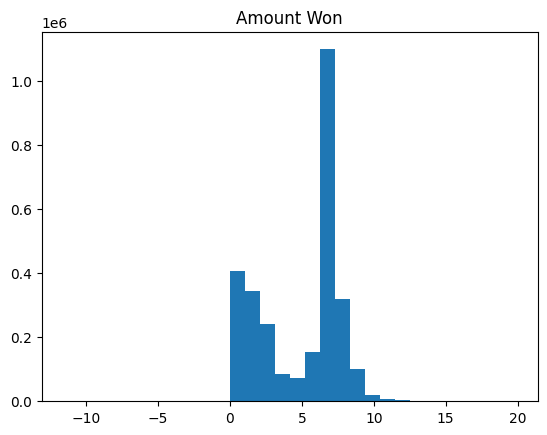

In [26]:
for column in draw_numerics.columns:
    plt.figure()
    plt.hist(np.log(data[column] + 1e-5),bins=30)
    plt.title(column)
    plt.show()

#### Graphing the non-numerics

Although there are missing values in the non-numerics, graphing to have visual representation

In [27]:
scratch_non_numerics = data_scratch.select_dtypes("object")
draw_non_numerics = data_draw.select_dtypes("object")

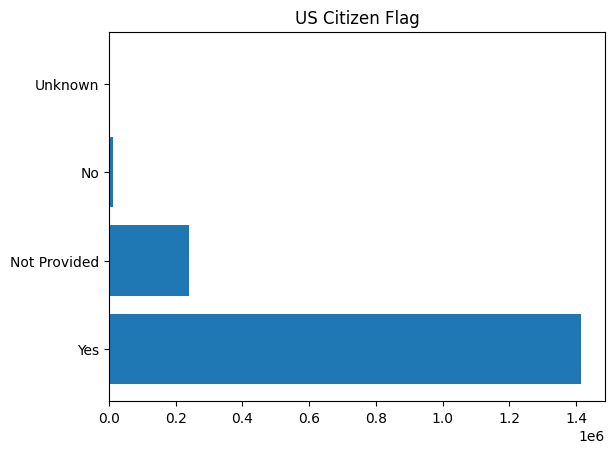

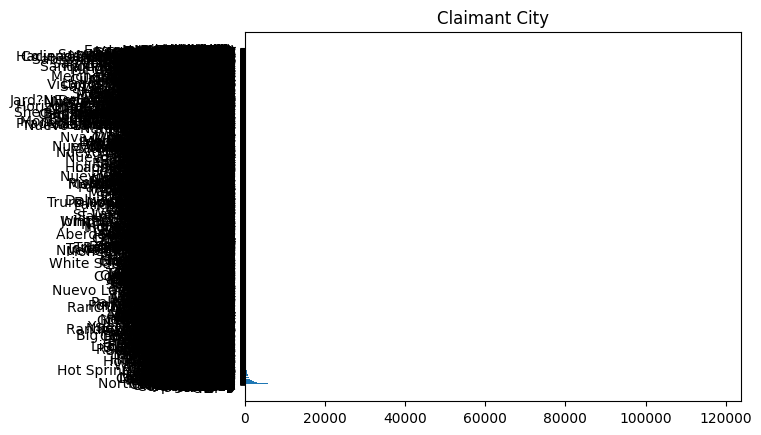

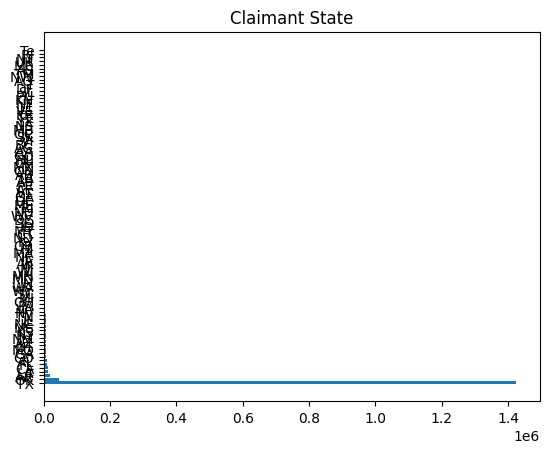

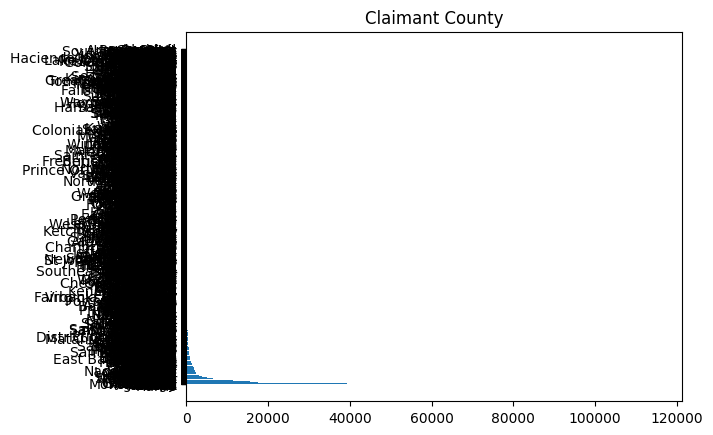

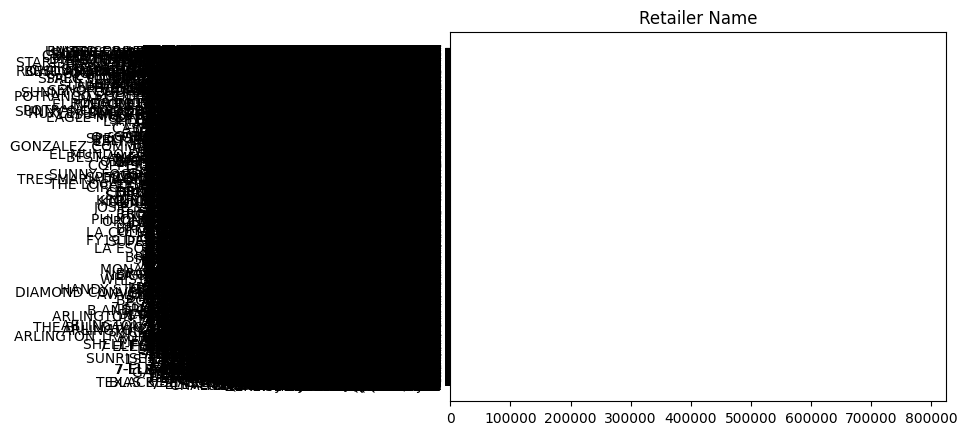

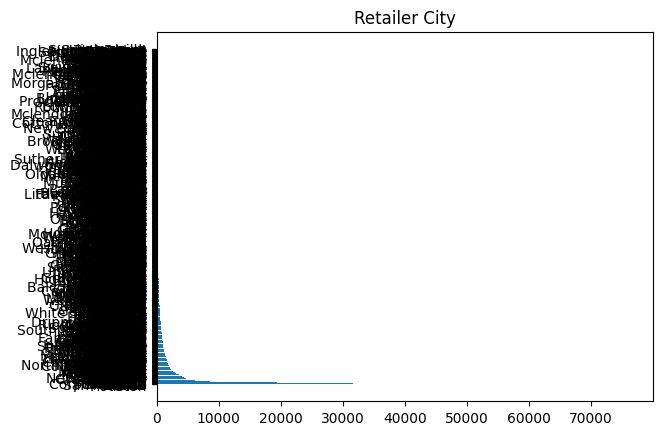

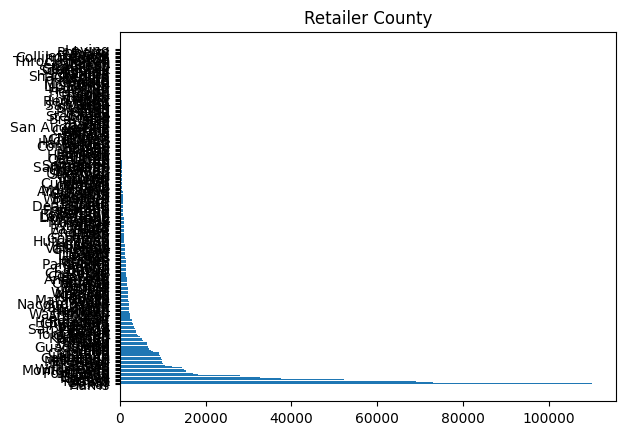

In [28]:
for column in scratch_non_numerics.columns:
    plt.figure()
    vc = data_scratch[column].value_counts()
    plt.barh(y=vc.index,width=vc.values)
    plt.title(column)
    plt.show()

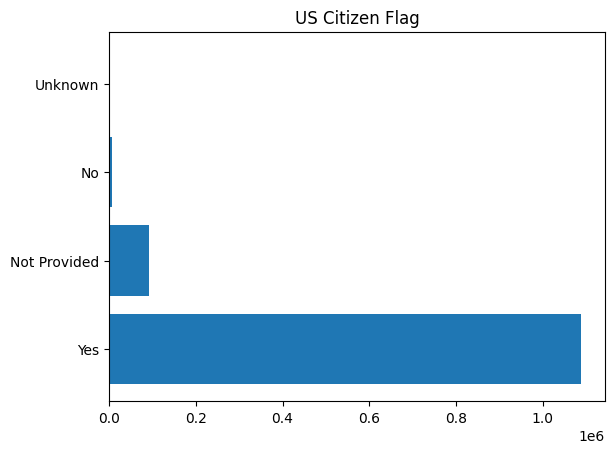

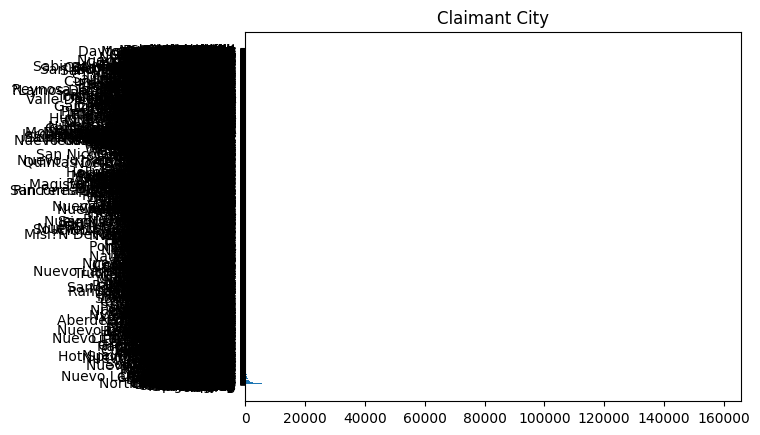

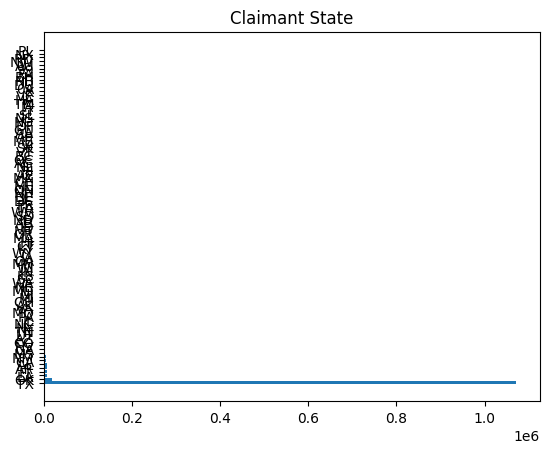

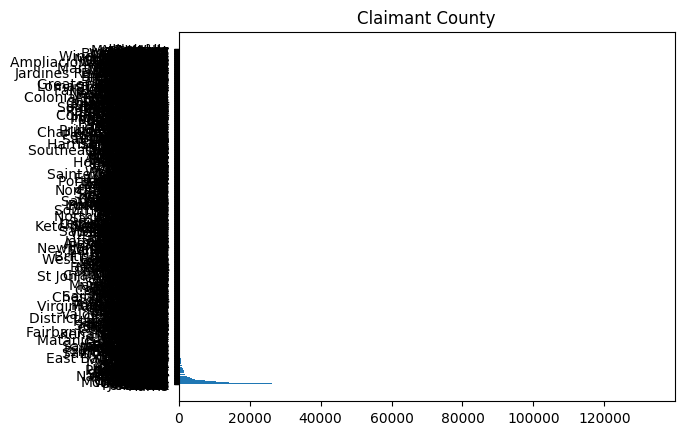

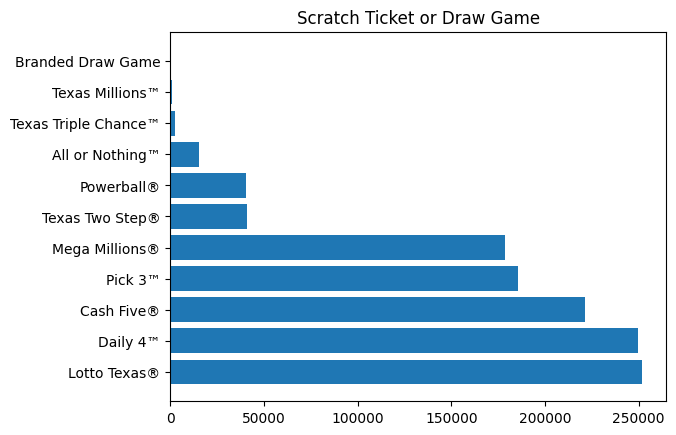

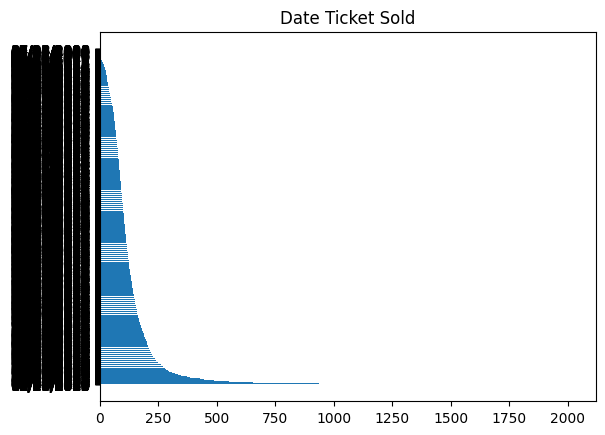

ValueError: 
CIGARETTES FOR LE$$ #2
                 ^
ParseException: Expected end of text, found '$'  (at char 17), (line:1, col:18)

<Figure size 640x480 with 1 Axes>

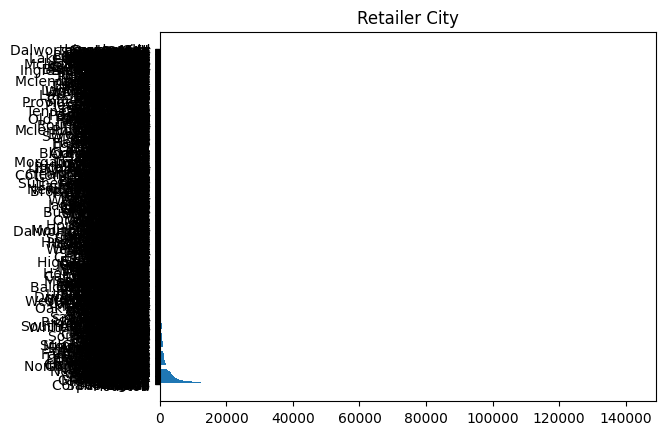

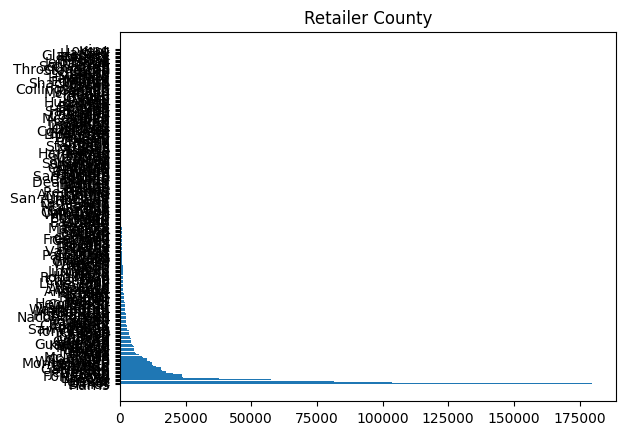

In [29]:
for column in draw_non_numerics.columns:
    plt.figure()
    vc = data_draw[column].value_counts()
    plt.barh(y=vc.index,width=vc.values)
    plt.title(column)
    plt.show()

Encountered error for retailer name since one retailer name is Cigarettes for Le$$, $ sign produces error


<Axes: title={'center': 'Retailer Name'}, xlabel='Retailer Name', ylabel="['Retailer Name']">

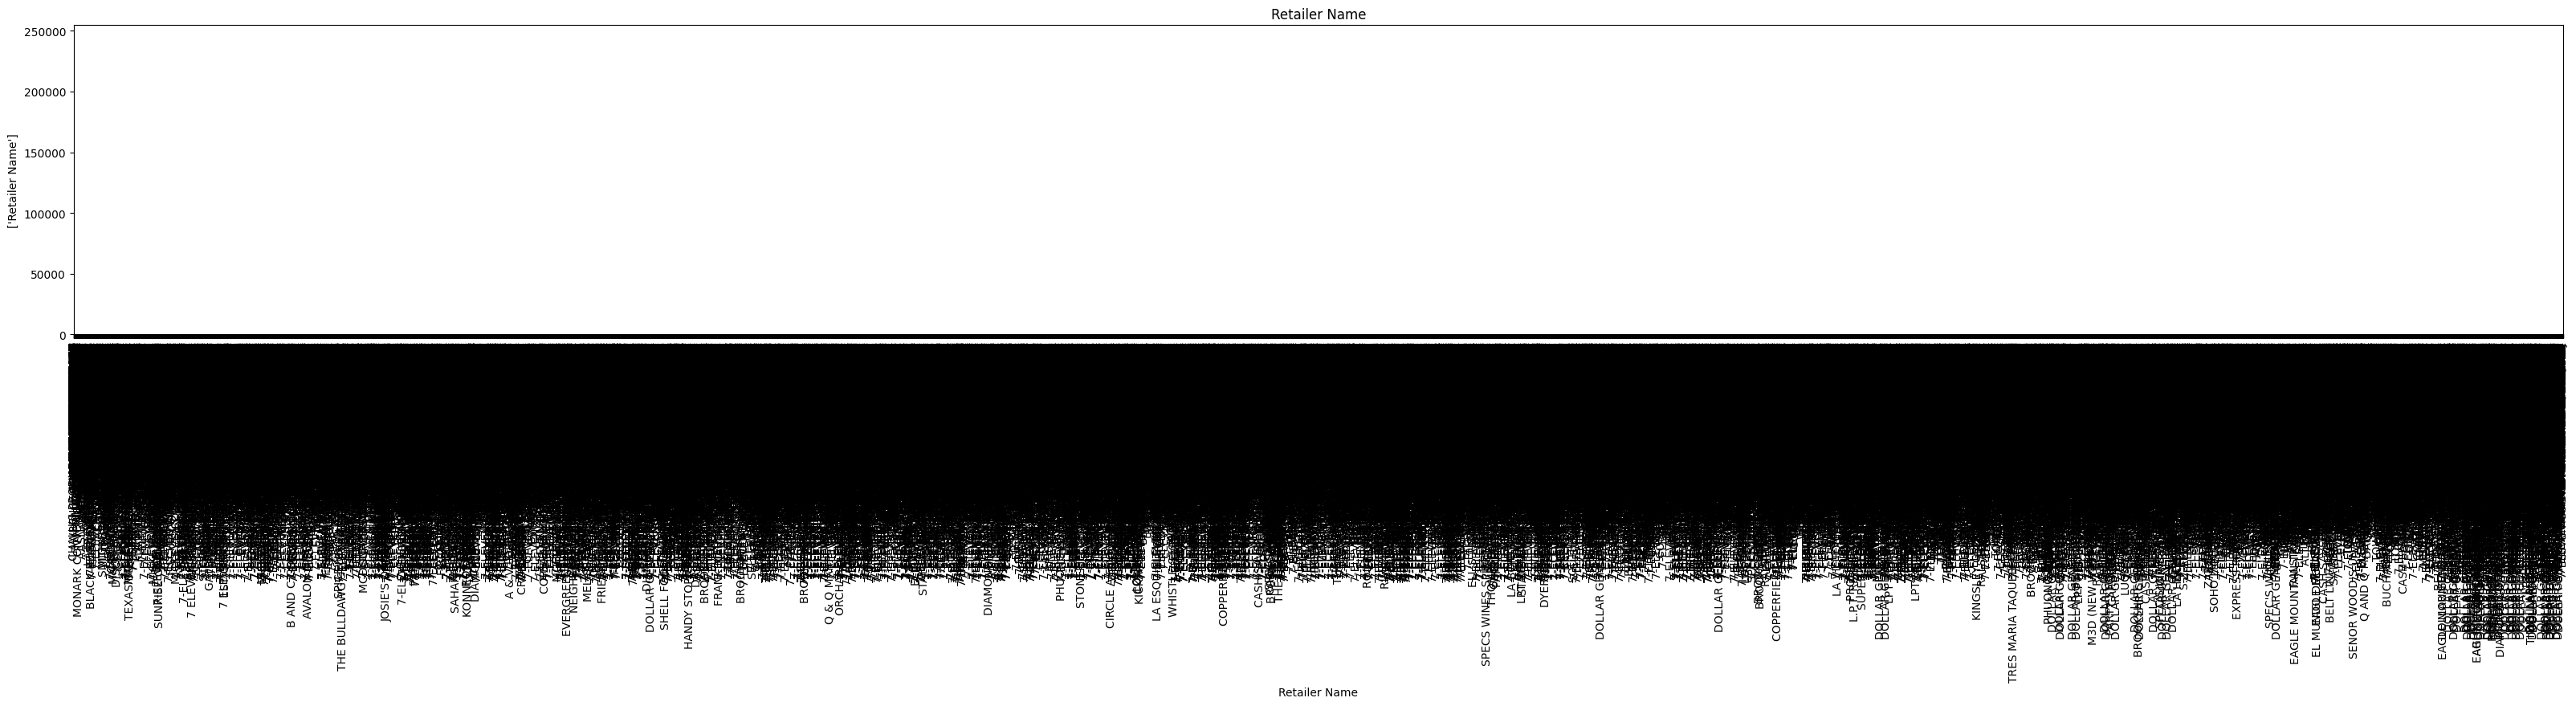

In [30]:
# Replace every $ for s 
data_draw["Retailer Name"] = [item.replace("$", "s") for item in data_draw["Retailer Name"]]

# Reload into non_numerics
draw_non_numerics = data_draw.select_dtypes("object")

# Graph just retailer name as bar graph, having the names be the y axis
plt.figure(figsize=(40, 5))
plt.title("Retailer Name")
plt.ylabel(["Retailer Name"])
plt.xlabel("Count")
plt.xticks(rotation=45)
draw_non_numerics["Retailer Name"].value_counts().plot(kind='bar')

#### Cleaning Non-numerics

In [31]:
data_scratch.isna().sum()

Amount Won                  0
US Citizen Flag             0
Claimant City              51
Claimant State            466
Claimant County        572256
Scratch Ticket Cost         0
Retailer Name               0
Retailer City          786027
Retailer County        786027
dtype: int64

In [32]:
data_draw.isna().sum()

Amount Won                          0
US Citizen Flag                     0
Claimant City                      27
Claimant State                   1547
Claimant County                447310
Scratch Ticket or Draw Game         0
Date Ticket Sold               546150
Retailer Name                       0
Retailer City                  242363
Retailer County                242363
dtype: int64

The amount of missing values for claimant city and state in both scratch and draw are inconsequential compared to the total amount of data so we impute "unknown" for the nans

In [33]:
data_scratch["Claimant City"] = data_scratch["Claimant City"].fillna("Unknown")
data_scratch["Claimant State"] = data_scratch["Claimant State"].fillna("Unknown")
data_draw["Claimant City"] = data_draw["Claimant City"].fillna("Unknown")
data_draw["Claimant State"] = data_draw["Claimant State"].fillna("Unknown")

In [34]:
data_draw.isna().sum()

Amount Won                          0
US Citizen Flag                     0
Claimant City                       0
Claimant State                      0
Claimant County                447310
Scratch Ticket or Draw Game         0
Date Ticket Sold               546150
Retailer Name                       0
Retailer City                  242363
Retailer County                242363
dtype: int64

Claimant county, retailer city, retailer county, and date ticket sold all hvae too many missing values to impute unknown so we will employ a random element based on the proportion of the distribution

In [35]:
for column in data_scratch.columns[data_scratch.isna().sum() > 0]:
    # setting a random sample for missing values
    probs = data_scratch[column].value_counts(normalize=True).values
    names =  data_scratch[column].value_counts().index
    n_nans = data_scratch[column].isna().sum()
    random_empirical = np.random.choice(names,p=probs,replace=True,size=n_nans)
    
    # replacing the missing values with the random sample
    sel = data_scratch[column].isna()
    data_scratch.loc[sel,column] = random_empirical

In [36]:
for column in data_draw.columns[data_draw.isna().sum() > 0]:
    # setting a random sample for missing values
    probs = data_draw[column].value_counts(normalize=True).values
    names =  data_draw[column].value_counts().index
    n_nans = data_draw[column].isna().sum()
    random_empirical = np.random.choice(names,p=probs,replace=True,size=n_nans)
    
    # replacing the missing values with the random sample
    sel = data_draw[column].isna()
    data_draw.loc[sel,column] = random_empirical

In [37]:
#Confirming no missing values
data_scratch.isna().sum()

Amount Won             0
US Citizen Flag        0
Claimant City          0
Claimant State         0
Claimant County        0
Scratch Ticket Cost    0
Retailer Name          0
Retailer City          0
Retailer County        0
dtype: int64

In [38]:
data_draw.isna().sum()

Amount Won                     0
US Citizen Flag                0
Claimant City                  0
Claimant State                 0
Claimant County                0
Scratch Ticket or Draw Game    0
Date Ticket Sold               0
Retailer Name                  0
Retailer City                  0
Retailer County                0
dtype: int64

In [39]:
# Store data for next notebook
%store data_draw
%store data_scratch

Stored 'data_draw' (DataFrame)
Stored 'data_scratch' (DataFrame)
